In [8]:
%run IDM_helper_functions.ipynb

## Train IDM

## Simulate from LCA and fit with IDM

In [69]:
x = simul_LCA_full_simp(np.tile([1,1.5,0.4], (100,1)))
print((100-sum(x[:,1]))/100)
print(x[0:10,:])


sim0
tensor(0.9800)
tensor([[1.5250, 0.0000],
        [1.2400, 0.0000],
        [2.1500, 0.0000],
        [0.8360, 0.0000],
        [3.3680, 0.0000],
        [0.7630, 0.0000],
        [1.3050, 0.0000],
        [0.8190, 0.0000],
        [2.1850, 0.0000],
        [1.9070, 0.0000]])


In [5]:
#prior_LCA = utils.BoxUniform(low=[0, 0.6, 0, 0.2], high=[1, 1.5, 0.4, 0.5])
LCA_parameters = prior.sample((20,))

n_trials = 1000
sim_num = 20

par_fitted = np.zeros((sim_num,4))

In [6]:
for i in range(sim_num):
    print(i)
    LCA_o = simul_LCA_full_simp(np.tile(LCA_parameters[i,:], (n_trials,1))) # simulate IDM data
    print(LCA_parameters[i,:])
    print(LCA_o[0:10,:])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)

0
sim0
tensor([0.0966, 1.0640, 0.4251, 0.2489])
tensor([[1.0069, 1.0000],
        [1.5299, 1.0000],
        [0.8419, 0.0000],
        [1.2309, 1.0000],
        [1.0509, 1.0000],
        [1.5799, 0.0000],
        [1.8369, 0.0000],
        [3.1809, 0.0000],
        [3.2489, 1.0000],
        [1.6859, 1.0000]])


C:\Users\ra36qix\Documents\GitHub\sbi\sbi\utils\sbiutils.py:316: UserWarning: An x with a batch size of 1000 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  warnings.warn(


[0.10026385 1.1115205  0.45711964 0.24912414]
1
sim0
tensor([0.2621, 1.3431, 0.5477, 0.4438])
tensor([[2.9468, 0.0000],
        [0.9888, 0.0000],
        [2.4718, 0.0000],
        [2.4878, 0.0000],
        [3.4438, 1.0000],
        [3.4438, 0.0000],
        [1.6328, 0.0000],
        [3.4438, 0.0000],
        [1.2748, 0.0000],
        [1.3728, 0.0000]])
[0.13881858 1.4964802  0.4327244  0.443847  ]
2
sim0
tensor([0.2472, 1.2113, 0.6954, 0.4390])
tensor([[3.4390, 0.0000],
        [3.2860, 1.0000],
        [1.0700, 0.0000],
        [2.1250, 0.0000],
        [1.0840, 0.0000],
        [3.0530, 0.0000],
        [1.7630, 0.0000],
        [1.4830, 1.0000],
        [3.4390, 0.0000],
        [3.4390, 1.0000]])
[0.17346895 1.4002783  0.4436189  0.4389969 ]
3
sim0
tensor([0.4741, 1.4668, 0.2304, 0.2072])
tensor([[2.5312, 0.0000],
        [1.1072, 0.0000],
        [3.2072, 0.0000],
        [1.1392, 0.0000],
        [2.7192, 0.0000],
        [1.3812, 0.0000],
        [3.2072, 1.0000],
        [0.572

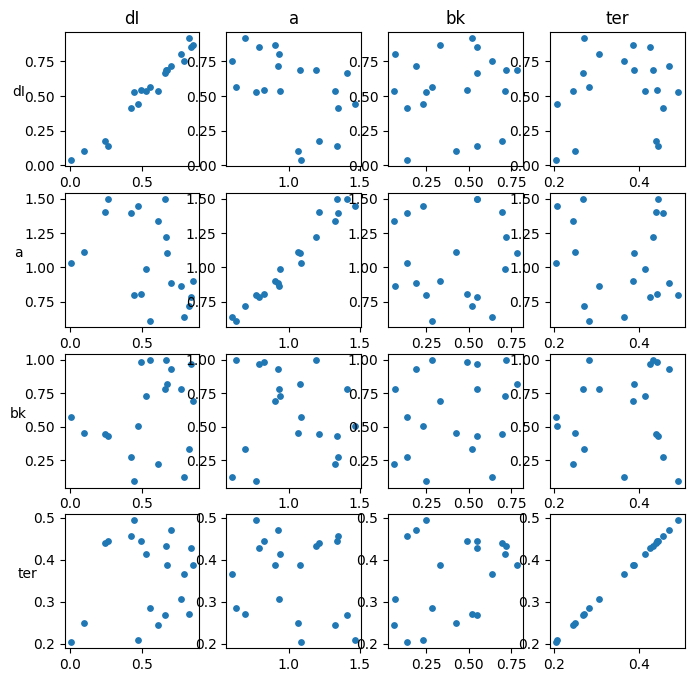

In [7]:
par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

In [174]:
# true parameters
dI = -0.5
a = 1
bk = 0.2
Ter = 0

z_new = np.sqrt(bk)*(a-dI/bk)
print(z_new)

1.5652475842498528


In [179]:
# creat data from OU samples using the true parameters
num_simulations = 100
prior = utils.BoxUniform(low=[-0.5, 1, 0.2, 0], high=[-0.5, 1, 0.2, 0])
parameters = prior.sample((num_simulations,))
x = simul_LCA_full_simp(np.array(parameters))
rts = x[x[:,1]==1][:,0]

sim0


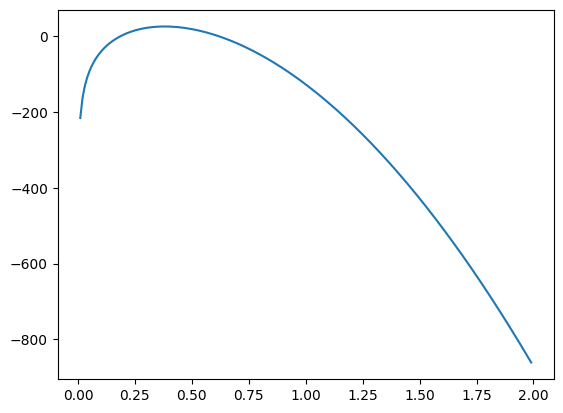

In [180]:
# calculate and plot log-likelihood against Z_new
lls = []
for i in np.arange(0.01,2,0.01):
    z_new = i
    rts_new = bk*rts
    
    inside = -np.exp(-rts_new)*z_new**2/(2*np.sinh(rts_new)) + rts_new/2
    log_numerator = np.log(z_new) + inside
    denominator = np.sqrt(2*np.pi*np.sinh(rts_new)**3)

    ll = sum(log_numerator - np.log(denomenator))
    lls.append(ll)

plt.plot(np.arange(0.01,2,0.01),lls)

In [118]:
def OU_loglikelihood(parameters,rts):
    
    dI, a, bk = parameters[0], parameters[1], parameters[2]
    
    z_new = np.sqrt(bk)*(a-dI/bk)
    rts_new = bk*rts
    
    inside = -np.exp(-rts_new)*z_new**2/(2*np.sinh(rts_new)) + rts_new/2
    log_numerator = np.log(z_new) + inside
    denominator = np.sqrt(2*np.pi*np.sinh(rts_new)**3)
    
    ll = sum(log_numerator - np.log(denomenator))
    return ll
    

sim0


In [140]:
num_simulations_test = 10000
lls = []
prior_test = utils.BoxUniform(low=[-1, 0.6, 0], high=[0, 1.5, 0.4])
parameters_test = prior_test.sample((num_simulations_test,))


In [141]:
for i in range(num_simulations_test):
    lls.append(OU_loglikelihood(parameters = parameters_test[i,:], rts = rts))

C:\Users\ra36qix\AppData\Local\Temp\ipykernel_12304\219888512.py:1: RuntimeWarning: invalid value encountered in log
  plt.scatter(parameters_test[:,2],np.log(lls))


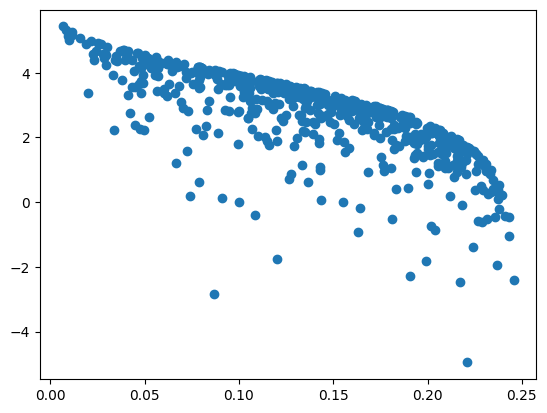

In [144]:
plt.scatter(parameters_test[:,2],np.log(lls))